# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

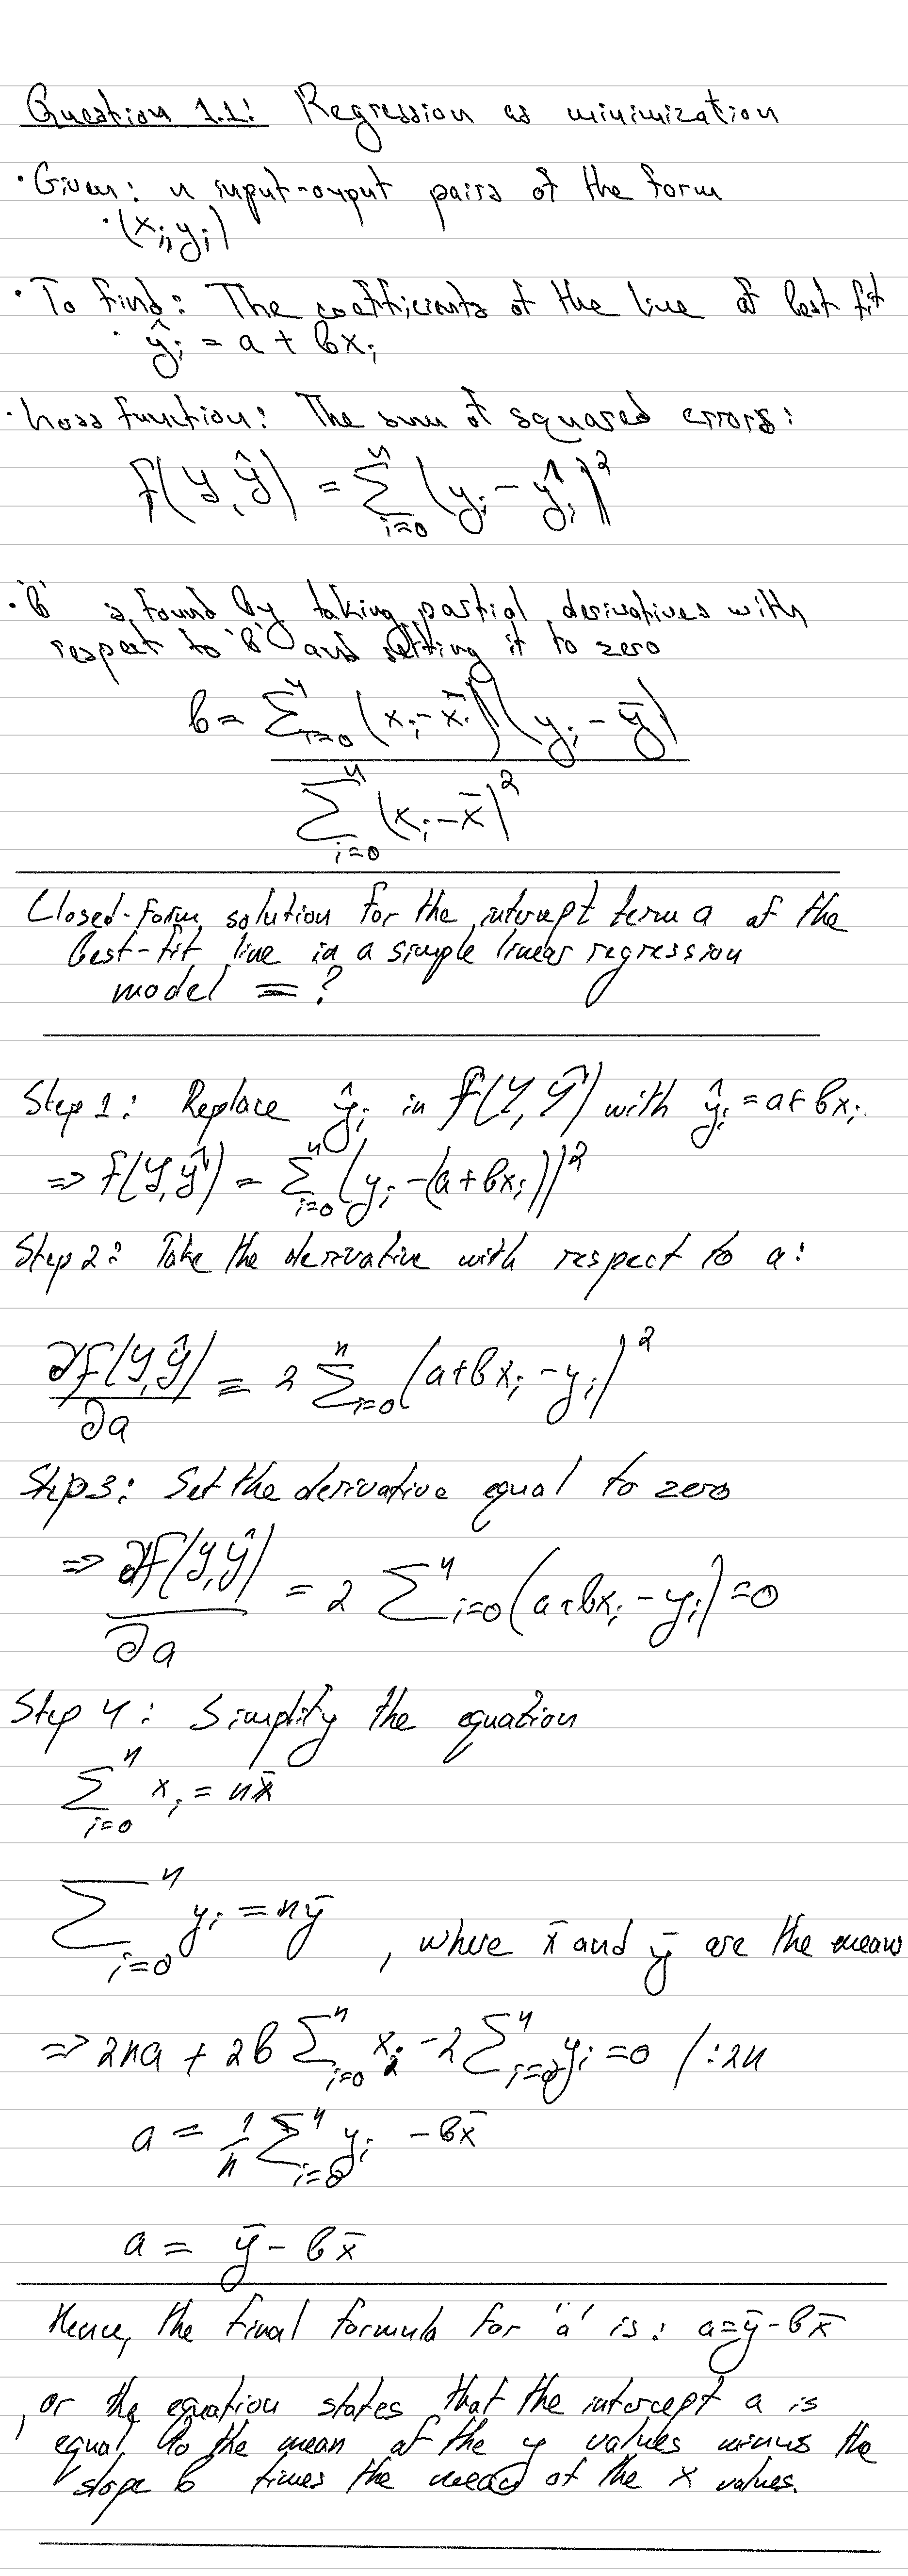

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

*Add your text answer here*

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

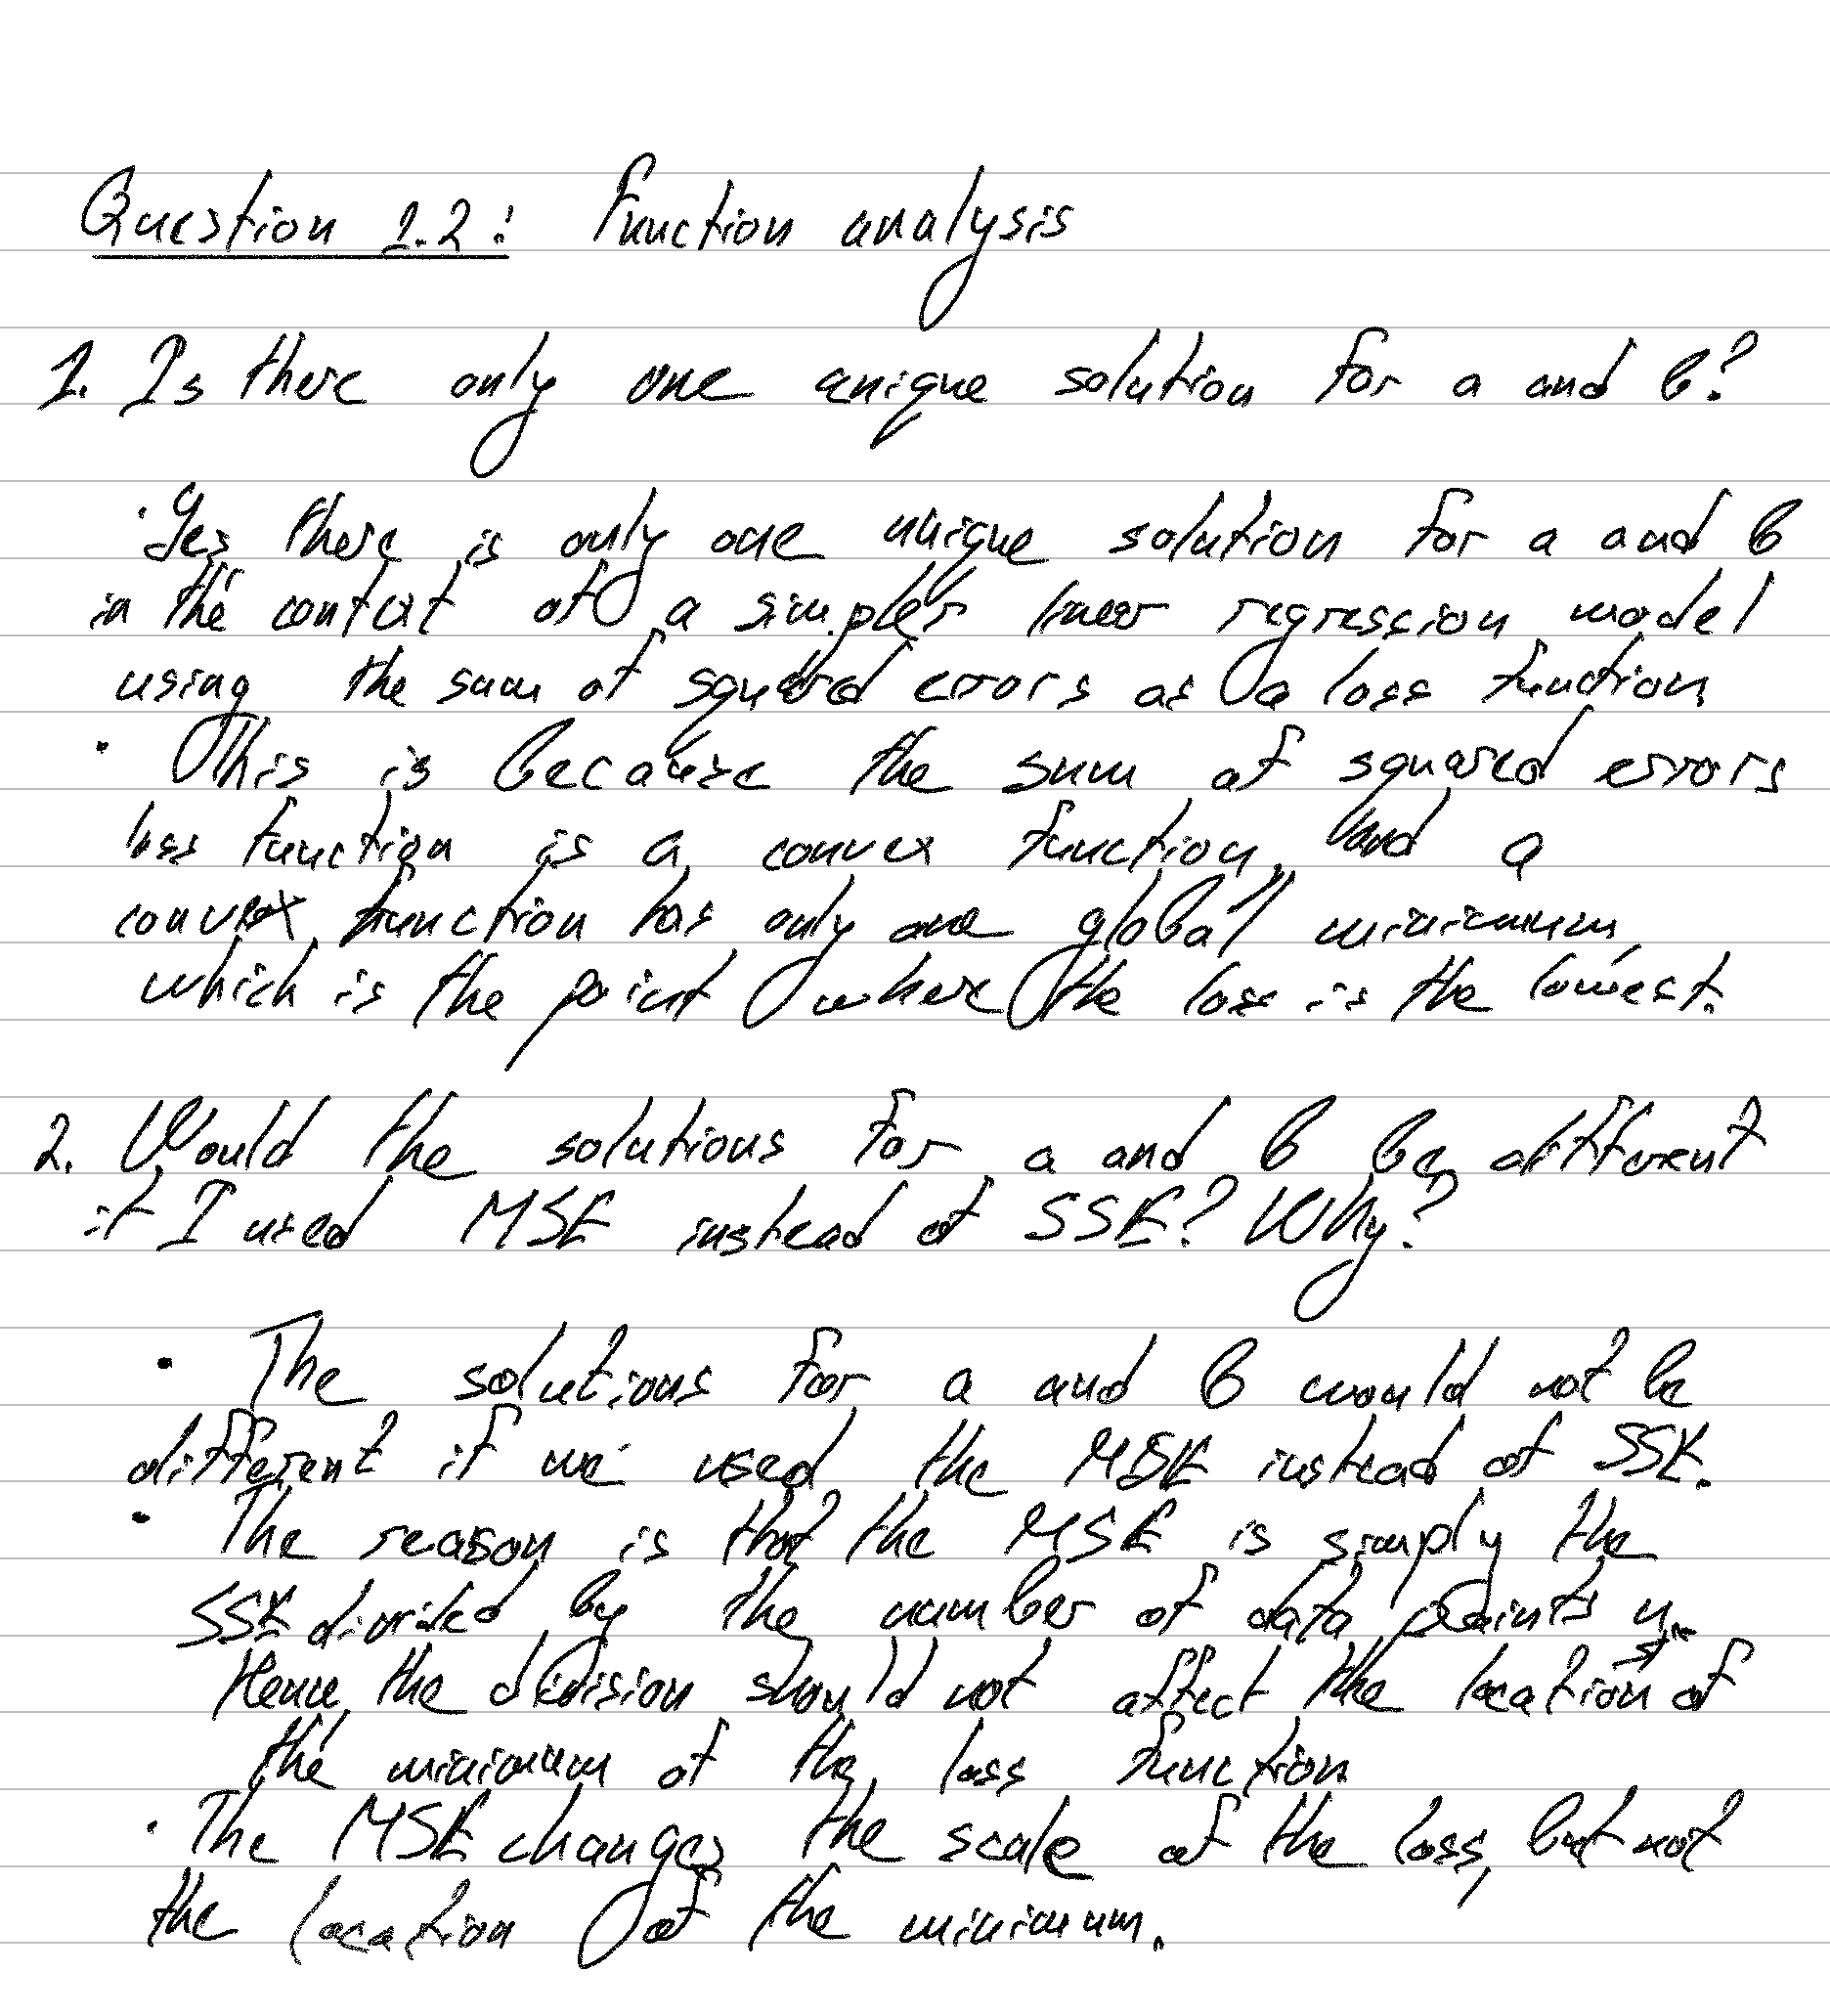

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

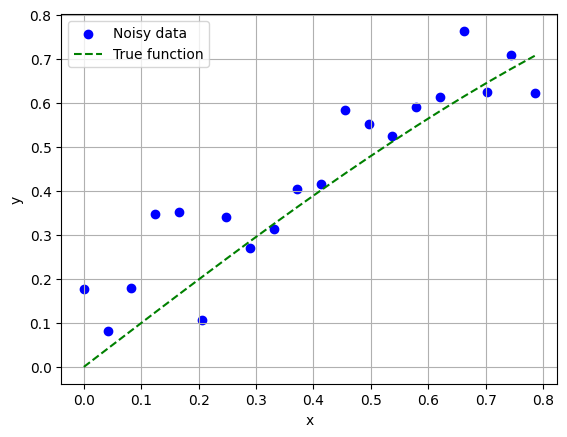

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, size=x.shape)
    y = np.sin(x) + noise
    return y

np.random.seed(0)

n_samples = 20
epsilon = 0.1

x = np.linspace(0, np.pi/4, n_samples)
y_noisy = generate_sin(x, epsilon)

y_pure = np.sin(x)

plt.scatter(x, y_noisy, label='Noisy data', color='blue')
plt.plot(x, y_pure, label='True function', color='green', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

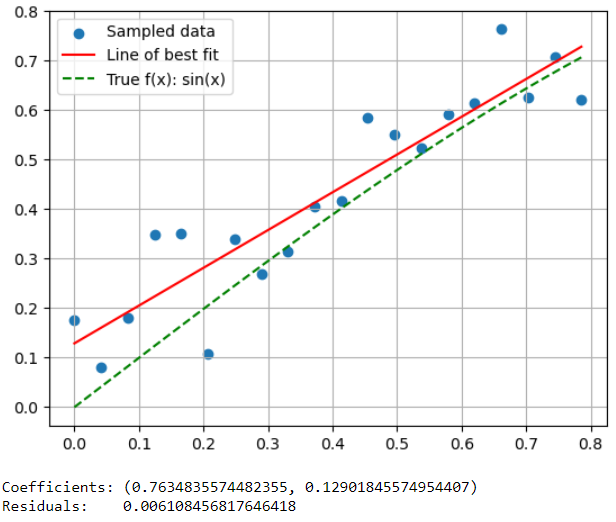

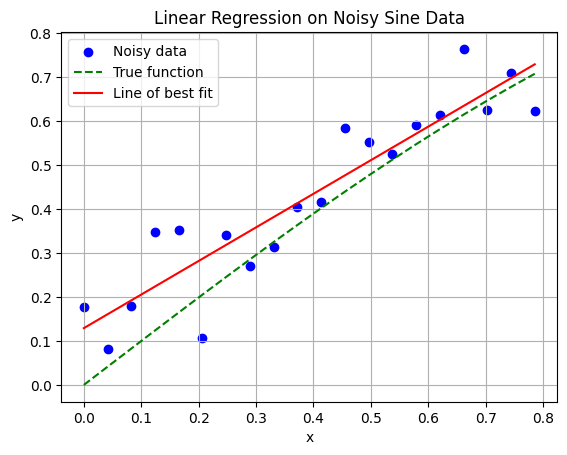

Coefficients: a = 0.12901845574954407, b = 0.7634835574482355
Residuals: 0.12216913635292836


In [6]:
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred) ** 2)
    return sos

def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    numerator = np.sum((xs - x_mean) * (ys - y_mean))
    denominator = np.sum((xs - x_mean) ** 2)
    
    b = numerator / denominator
    a = y_mean - b * x_mean

    y_pred = a + b * xs
    
    res = compute_sos(ys, y_pred)
    return a, b, res, y_pred


n_samples = 20
epsilon = 0.1

x = np.linspace(0, np.pi/4, n_samples)

y_true = np.sin(x)
a, b, res, y_best = lin_reg(x, y_noisy)
y_best = b*x+a


plt.scatter(x, y_noisy, label='Noisy data', color='blue')
plt.plot(x, y_true, label='True function', color='green', linestyle='--')
plt.plot(x, y_best, label='Line of best fit', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Noisy Sine Data')
plt.legend()
plt.grid()

plt.show()

print(f"Coefficients: a = {a}, b = {b}")
print(f"Residuals: {res}")

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

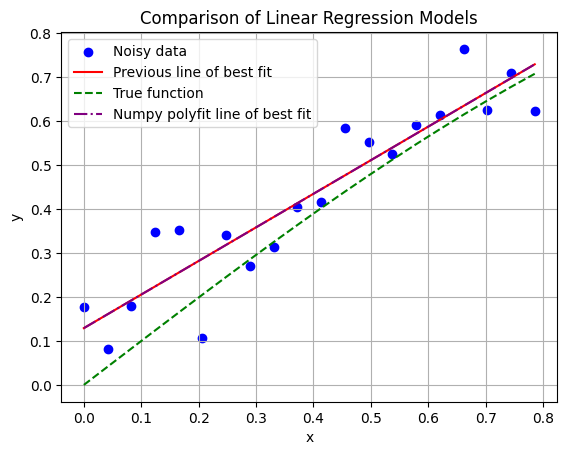

Original coefficients: a = 0.1290, b = 0.7635
Original residuals: 0.1222
Numpy polyfit coefficients: a = 0.1290, b = 0.7635
Numpy polyfit residuals: 0.1222


In [7]:
coefficients_np = np.polyfit(x, y_noisy, 1)
a_np, b_np = coefficients_np[1], coefficients_np[0]
y_best_np = np.polyval(coefficients_np, x)

residuals_np = compute_sos(y_noisy, y_best_np)

plt.scatter(x, y_noisy, label='Noisy data', color='blue')
plt.plot(x, y_best, label='Previous line of best fit', color='red')
plt.plot(x, y_true, label='True function', color='green', linestyle='--')

plt.plot(x, y_best_np, label='Numpy polyfit line of best fit', color='purple', linestyle='-.')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Linear Regression Models')
plt.legend()
plt.grid()

plt.show()

print("Original coefficients: a = {:.4f}, b = {:.4f}".format(a, b))
print("Original residuals: {:.4f}".format(res))
print("Numpy polyfit coefficients: a = {:.4f}, b = {:.4f}".format(a_np, b_np))
print("Numpy polyfit residuals: {:.4f}".format(residuals_np))

*The comparison between the coefficients and residuals obtained from NumPy's polyfit function and the manually derived linear regression model shows that they are very similar, if not identical. This similarity indicates that polyfit is performing linear regression similarly to the manual calculation using the least squares method. Both approaches aim to minimize the sum of the squared differences between the observed values and the model's predictions. Since the results from polyfit and the manual calculation match closely, it confirms that the manual method is correctly implemented.*

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

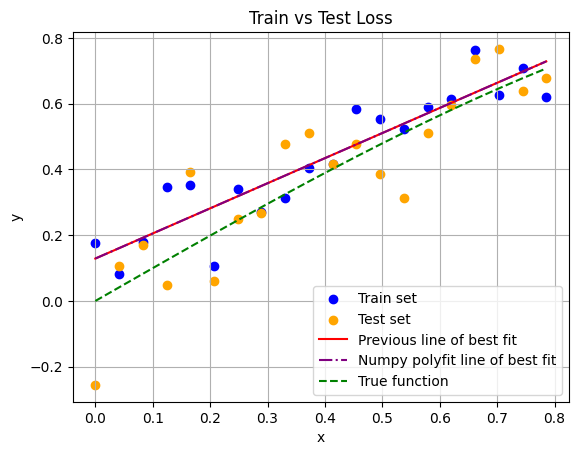

Coefficients:  (0.12901845574954407, 0.7634835574482355)
Train loss:  0.0061084568176464175
Test loss:  0.01893049185927349


In [9]:
def compute_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse


y_test = generate_sin(x, epsilon)


test_loss = compute_mse(y_test, y_best_np)  


train_loss = compute_mse(y_noisy, y_best_np)  


plt.scatter(x, y_noisy, label="Train set", color='blue')
plt.scatter(x, y_test, label="Test set", color='orange')


plt.plot(x, y_best, label='Previous line of best fit', color='red')
plt.plot(x, y_best_np, label='Numpy polyfit line of best fit', color='purple', linestyle='-.')
plt.plot(x, y_true, label='True function', color='green', linestyle='--')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid()
plt.show()


print("Coefficients: ", (a, b))
print("Train loss: ", train_loss)
print("Test loss: ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

*The train loss represents how well the model fits the data it was trained on, whereas the test loss represents how well the model generalizes to new, unseen data. Typically, we would expect the training loss to be lower because the model is optimized for this data. However, a good model should have a test loss that is comparable to the training loss, indicating good generalization. If the test loss is much higher, it might be a sign of overfitting to the training data.*

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

*Changing the number of samples, n, affects model accuracy; more samples typically improve it. Changing the noise level, ϵ, affects how well the model fits; less noise usually means better fit. More data and less noise generally result in lower training and test errors, improving model performance*

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

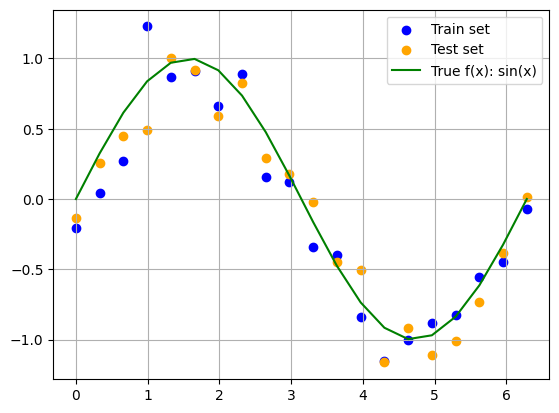

In [10]:
n_samples = 20
epsilon = 0.2
x_range = (0, 2 * np.pi)

x = np.linspace(x_range[0], x_range[1], n_samples)

y_train = generate_sin(x, epsilon)
y_test = generate_sin(x, epsilon)

x_pure = x  
y_pure = np.sin(x_pure)

plt.scatter(x, y_train, label="Train set", color='blue')
plt.scatter(x, y_test, label="Test set", color='orange')
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='green')

plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

C:\Users\sa6ko\AppData\Local\Temp\ipykernel_16340\481049452.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)
C:\Users\sa6ko\AppData\Local\Temp\ipykernel_16340\481049452.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)
C:\Users\sa6ko\AppData\Local\Temp\ipykernel_16340\481049452.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)


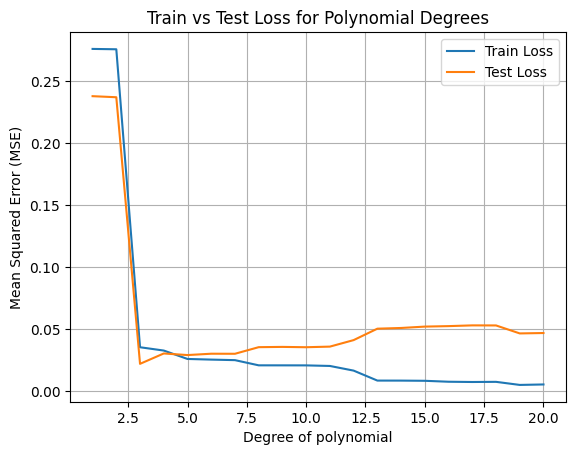

Best degree: 3
Coefficients of the best polynomial: [ 0.09122818 -0.86500145  1.90047565 -0.32206689]
Train loss for best polynomial: 0.035259704677067585
Test loss for best polynomial: 0.02188958415404104


In [11]:
max_degree = 20
train_losses = []
test_losses = []
coefficients_list = []

for degree in range(1, max_degree + 1):
    coefficients = np.polyfit(x, y_train, degree)
    coefficients_list.append(coefficients)
    y_train_pred = np.polyval(coefficients, x)
    y_test_pred = np.polyval(coefficients, x)
    train_mse = compute_mse(y_train, y_train_pred)
    test_mse = compute_mse(y_test, y_test_pred)
    train_losses.append(train_mse)
    test_losses.append(test_mse)

plt.plot(range(1, max_degree + 1), train_losses, label='Train Loss')
plt.plot(range(1, max_degree + 1), test_losses, label='Test Loss')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train vs Test Loss for Polynomial Degrees')
plt.legend()
plt.grid()
plt.show()

best_degree = np.argmin(test_losses) + 1  
print(f"Best degree: {best_degree}")
print(f"Coefficients of the best polynomial: {coefficients_list[best_degree - 1]}")
print(f"Train loss for best polynomial: {train_losses[best_degree - 1]}")
print(f"Test loss for best polynomial: {test_losses[best_degree - 1]}")


**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

*The warning "Polyfit may be poorly conditioned" means that the math behind fitting your polynomial curve to the data might not work well due to numerical errors, especially if you're trying to fit a curve with a really high degree to your data. This can lead to inaccurate predictions or a model that doesn't work well in practice.*

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

C:\Users\sa6ko\AppData\Local\Temp\ipykernel_16340\373380041.py:8: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y_train, degree)


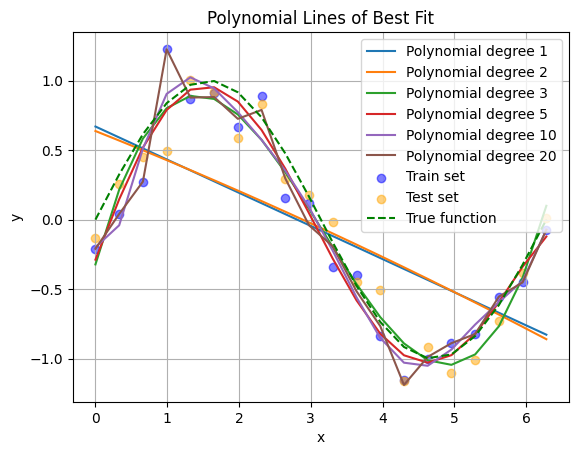

In [12]:
# Provided degrees for polynomial fitting
degrees = [1, 2, 3, 5, 10, 20]

# Re-using the existing 'x', 'y_train', 'y_test', and 'y_pure' variables
# Plot lines of best fit for specified degrees
for degree in degrees:
    # Fit polynomial to the training data
    coefficients = np.polyfit(x, y_train, degree)
    # Predict y values for the polynomial
    y_fit = np.polyval(coefficients, x)
    
    # Plot the polynomial line of best fit
    plt.plot(x, y_fit, label=f'Polynomial degree {degree}')

# Plot the training and test data
plt.scatter(x, y_train, label='Train set', color='blue', alpha=0.5)
plt.scatter(x, y_test, label='Test set', color='orange', alpha=0.5)
# Plot the true function
plt.plot(x, y_pure, label='True function', color='green', linestyle='--')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Lines of Best Fit')
plt.legend()
plt.grid()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

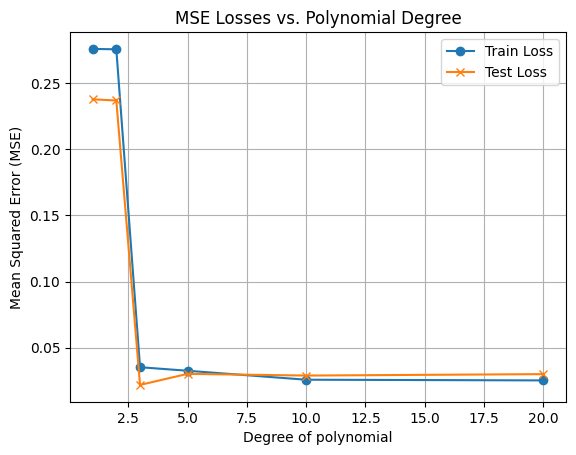

In [13]:
# Plot the MSE losses versus the flexibility (degree of the fitting polynomials)
plt.plot(degrees, train_losses[:len(degrees)], label='Train Loss', marker='o')
plt.plot(degrees, test_losses[:len(degrees)], label='Test Loss', marker='x')

# Adding labels and legend
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Losses vs. Polynomial Degree')
plt.legend()
plt.grid()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

*Add your text answer here*